Likelihood lecture: Solutions to exercises
============

In [1]:
%pylab inline
import seaborn

Populating the interactive namespace from numpy and matplotlib


# Exercise 1

This is one example of what the Mock data could be.

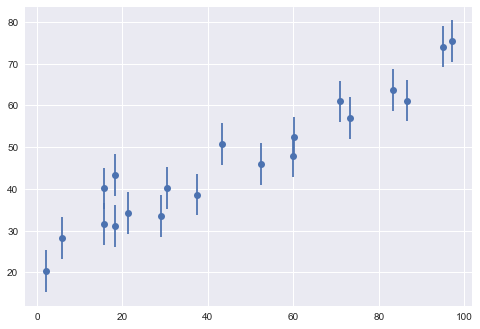

In [2]:
def make_data(intercept, slope, N=20, dy=5, rseed=42):
    rand = numpy.random.RandomState(rseed)
    x = 100 * rand.rand(N)
    y = intercept + slope * x
    y += dy * rand.randn(N)
    return x, y, dy * ones_like(x)

theta_true = [25, 0.5]
x, y, dy = make_data(*theta_true)
errorbar(x, y, dy, fmt='o');

# Exercise 2

In [3]:
# x, y, dy are all assumed to be arrays
# theta is a list of model parameters, [intercept, slope]

def model(theta,x):
    """
    Computes model value given parameters and data.
    Returns ym array.
    """
    return theta[0] + theta[1]*x

def loglike(theta,x,y,dy):
    """
    Computes log-likelihood given data, uncertainties, model and model pars.
    """
    ym=model(theta,x)
    like=-0.5*(log(2.*pi*dy**2)+(y-ym)**2/dy**2)
    return like.sum()

In [4]:
theta=[20,-0.5]

In [5]:
ym=model(theta,x)

<Container object of 3 artists>

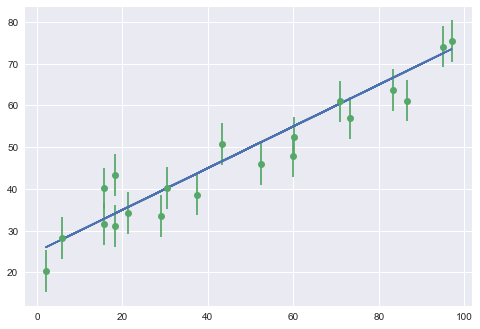

In [6]:
plot(x,model([25,0.5],x))
errorbar(x, y, dy, fmt='o')

In [8]:
print(loglike(theta,x,y,dy), loglike([25,0.5],x,y,dy))

-1376.11719488 -59.3058585913


In [10]:
print(exp(loglike(theta,x,y,dy)), exp(loglike([25,0.5],x,y,dy)))

0.0 1.75304421234e-26


# Exercise 3

What you really have to do is to turn a minimization—as provided by `scipy.optimize`—into a maximization problem

In [11]:
import scipy.optimize

Function conveniently designed such that the maximum of `loglike` corresponds to its minimum

In [12]:
fun= lambda theta : abs(loglike(theta,x,y,dy))

In [13]:
fun(theta)

1376.1171948829217

In [14]:
scipy.optimize.minimize(fun,[0.,1.])

      fun: 58.32162215747249
 hess_inv: array([[  4.16161962e+00,  -6.36138321e-02],
       [ -6.36138321e-02,   1.38985175e-03]])
      jac: array([  0.00000000e+00,  -4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 24
      nit: 4
     njev: 6
   status: 0
  success: True
        x: array([ 24.81802587,   0.47417324])